In [1]:
#pip3 install google.colab
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

###  Libraries

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

import torch

import os
import sys

from MLP import MLP
from Datasets.Datasets_Functions import *
from Visualization import Visualization
from Evaluations.Evaluation import Evaluator

### Global Variables

In [3]:
path_to_module = './' # 'C:\\Users\\PAPASOFT INC\\Desktop\\SOFT_SIL'
sys.path.append(path_to_module)
os.environ['OMP_NUM_THREADS'] = '6'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

### Load datasets

In [4]:
hashmap_path = path_to_module+"Datasets/"
hashmap = get_hashmap(hashmap_path)
#for key in hashmap.keys():
    #update_outer_hashmap(hashmap[dataset_name],path_to_module)
    #delete_from_inner_hashmap([key,'option_name'],path_to_module)
print(hashmap.keys())
dataset_name = "pendigits"
dataset_properties = hashmap[dataset_name]
print(dataset_properties)
batch_size = dataset_properties['batch_size'] #= 30
n_clusters = dataset_properties['n_clusters'] #= 3
dataloader, input_dim, data_np, labels = function_get_dataset(dataset_name, dataset_properties)
print('Data_Shape is:', input_dim)
print('Batches Number is:', len(dataloader))

dict_keys(['tcga', 'emnist_balanced_letters', 'emnist_mnist', 'emnist_balanced_digits', 'dermatology', 'ecoil', 'iris', 'rings', 'wine', 'australian', 'moons', 'squeezed_gauss', 'gauss_densities', 'pendigits', 'fashionmnist', '3dspheres', '20_newsgroups', 'coil20', 'cifar10', 'stl10', 'r15', 'r3'])
{'batch_size': 256, 'n_clusters': 10, 'module_name': 'Datasets.Datasets'}
Data_Shape is: 16
Batches Number is: 43


### Parameters

In [5]:
# Batch Size and Number of Clusters
batch_size = dataset_properties['batch_size']
n_clusters = dataset_properties['n_clusters']

# Training Epochs and Learning Rate
lr = 1e-3
n_epochs = 100
entr_lambda = 1

kmeans_initialization = True

### Create MLP model

In [6]:
mlp = MLP(device=device, n_clusters=n_clusters, input_dim=input_dim)
mlp.set_training_variables(dataloader=dataloader, batch_size=batch_size, n_epochs=n_epochs, lr=lr, entr_lambda=entr_lambda)
mlp.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
mlp.set_path()

mlp = mlp.to(device)

In [7]:
# Initialize the clustering layer using k-means
if kmeans_initialization : mlp.kmeans_initialization(10)

### Colors for visualization

In [8]:
color_list = list(mcolors.CSS4_COLORS.keys()) + list(mcolors.XKCD_COLORS.keys())
np.random.shuffle(color_list)
color_list = ['deepskyblue', 'gold', 'hotpink', 'limegreen'] + color_list
visualization = Visualization()

### Training the MLP

In [9]:
data, labels, clustering = mlp.train()
cluster_centers = mlp.get_clustering_layer_centers().cpu().detach().numpy()
data_dir_path = mlp.data_dir_path

Epoch: 0 Cl Loss: 55.0052 Entropy: 128.5576 Soft Sil: -12.0052 SIL: 0.0000 ACC: 0.55 PUR: 0.58 NMI: 0.54 ARI: 0.31
Epoch: 1 Cl Loss: 51.1837 Entropy: 126.8365 Soft Sil: -8.1837 SIL: 0.0000 ACC: 0.49 PUR: 0.52 NMI: 0.54 ARI: 0.25
Epoch: 2 Cl Loss: 54.1049 Entropy: 120.3211 Soft Sil: -11.1049 SIL: 0.0000 ACC: 0.40 PUR: 0.43 NMI: 0.49 ARI: 0.17
Epoch: 3 Cl Loss: 60.0696 Entropy: 106.8021 Soft Sil: -17.0696 SIL: 0.0000 ACC: 0.33 PUR: 0.35 NMI: 0.41 ARI: 0.11
Epoch: 4 Cl Loss: 67.2264 Entropy: 87.0304 Soft Sil: -24.2264 SIL: 0.0000 ACC: 0.23 PUR: 0.23 NMI: 0.22 ARI: 0.03
Epoch: 5 Cl Loss: 73.7131 Entropy: 65.3411 Soft Sil: -30.7131 SIL: 0.0000 ACC: 0.14 PUR: 0.14 NMI: 0.07 ARI: 0.00
Epoch: 6 Cl Loss: 78.5674 Entropy: 45.5048 Soft Sil: -35.5674 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 7 Cl Loss: 81.5910 Entropy: 30.4630 Soft Sil: -38.5910 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 8 Cl Loss: 83.2790 Entropy: 20.8285 Soft Sil: -40.2790 SIL: 0.0000 ACC: 0.10 P

Epoch: 72 Cl Loss: 85.9882 Entropy: 0.1947 Soft Sil: -42.9882 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 73 Cl Loss: 85.9886 Entropy: 0.1888 Soft Sil: -42.9886 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 74 Cl Loss: 85.9890 Entropy: 0.1830 Soft Sil: -42.9890 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 75 Cl Loss: 85.9893 Entropy: 0.1775 Soft Sil: -42.9893 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 76 Cl Loss: 85.9897 Entropy: 0.1722 Soft Sil: -42.9897 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 77 Cl Loss: 85.9900 Entropy: 0.1671 Soft Sil: -42.9900 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 78 Cl Loss: 85.9904 Entropy: 0.1622 Soft Sil: -42.9904 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 79 Cl Loss: 85.9907 Entropy: 0.1574 Soft Sil: -42.9907 SIL: 0.0000 ACC: 0.10 PUR: 0.10 NMI: 0.00 ARI: 0.00
Epoch: 80 Cl Loss: 85.9910 Entropy: 0.1529 Soft Sil: -42.9910 SIL: 0.0000 ACC: 0.10 PUR:

### $k$-means evaluation

In [10]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(data)
evaluator = Evaluator()
evaluator.evaluate_model(data, labels, kmeans.labels_)

(0.6670305676855895,
 0.7064228529839883,
 0.6819838140697344,
 0.5317786038493137,
 0)

C:\Users\PAPASOFT INC\Documents\GitHub\Soft-Silhouette\Visualization.py:70: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(cluster_centers[:n_clusters, 0], cluster_centers[:n_clusters, 1], c='red', marker='x', s=500, edgecolors='black', label='Cluster Centers')


Directory './Results/pendigits/MLP/100_Eps_out_10_bs_256_lr_0.001_entr_lambda_1/Experiments/No_TSNE' created successfully.


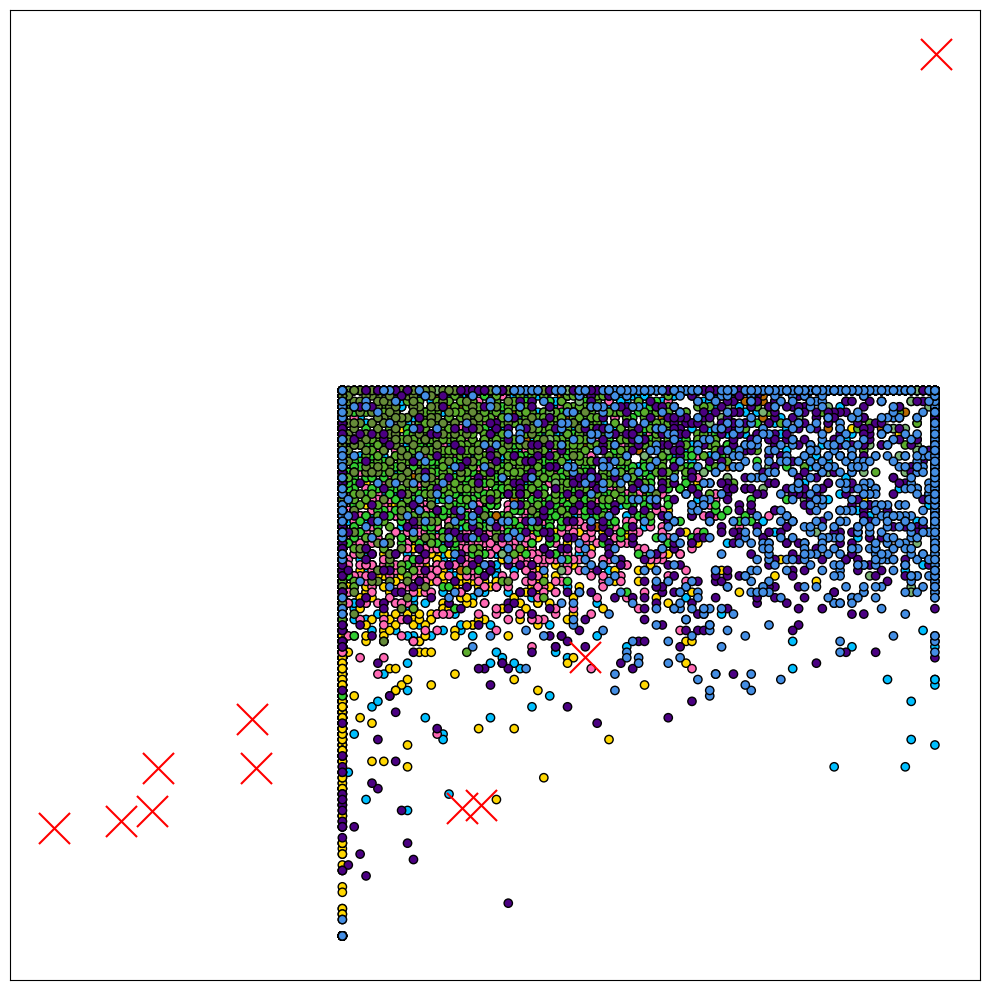

In [11]:
visualization.plot(data, labels, clustering, cluster_centers, mlp.data_dir_path)

In [12]:
#visualization.makeExcel()
#visualization.plot_tsne(mlp=True)